# Computer Project 1
Răzvan Fișer FAF 203 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Assignment 1
The first row in the table contains the aproximation for the <b>golden ratio</b> and the second row the error at each step. We observe that the error shing by a factor of about $2$ at each iterration. 

In [19]:
# Assignment 1

def fibNum(n):
    if (n == 1) or (n == 2):
        return 1
    a, b = 1, 1
    for i in range(n - 2):
        num = a + b
        a = b
        b = num
    return num
    
    
def R_n(terms):
    output = np.zeros((1, terms))
    for i in range(terms):
        output[0, i] = fibNum(i + 2) / fibNum(i + 1)
    errors = (1 + np.sqrt(5)) / 2 - output
    return pd.DataFrame(np.append(output, errors, axis=0))

In [20]:
R_n(40).head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.000000,2.000000,1.500000,1.666667,1.600000,1.625000,1.615385,1.619048,1.617647,1.618182,...,1.618034e+00,1.618034e+00,1.618034e+00,1.618034e+00,1.618034e+00,1.618034e+00,1.618034e+00,1.618034e+00,1.618034e+00,1.618034
1,0.618034,-0.381966,0.118034,-0.048633,0.018034,-0.006966,0.002649,-0.001014,0.000387,-0.000148,...,2.466916e-13,-9.414691e-14,3.597123e-14,-1.376677e-14,5.329071e-15,-1.998401e-15,8.881784e-16,-2.220446e-16,2.220446e-16,0.000000


### Assignment 2
By computing the McLauren series for $e^t$, where $t$ is any function dependent on $x$ and then integrating, we obtain the follwoing formula for the Gauss Error Function: 
$$\large P_n(x) = \frac{t}{1 \cdot 0!} - \frac{t^3}{3 \cdot 1!} + ... + \frac{(-1)^n t^{2n + 1}}{(2n + 1)n!}$$
We observe that this is a converging alternating series because the limit of the general term tends to 0 and each term gets consecutively smaller. Then, we know that $\| R_n \| \leq b_{n+1}$. So, therefore, we introduce the restriction that 
$$\large \frac{x^{2n+3}}{(2n+3)(n+1)!} \leq 10^{-5}$$ We iterate through possible values for $n$ until we have found the satisfactory value for the error:

In [27]:
#Assignment 2

def erfPoly(n, val):
    coef = np.array([ ((-1) ** (i)) / (2 * i + 1) * 1 / math.factorial(i) for i in range(n)])
    vals = np.array([val ** (2 * i + 1) for i in range(n)])
    return np.sum(coef * vals) * 2 / np.sqrt(math.pi)

def err2(n, x):
    return x ** (2 * n + 3) / math.factorial(n + 1) * 1 / (2 * n + 3)

In [28]:
n = 0
err = 10
while(err >= 10**(-5)):
    n += 1
    err = err2(n, 3)
print(n + 1)

30


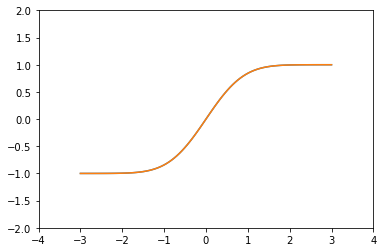

In [29]:
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
y = np.array([erfPoly(30, i) for i in x])
y2 = np.array([math.erf(i) for i in x])

plt.axis([-4, 4, -2, 2])
plt.plot(x, y)
plt.plot(x, y2)

### Assignment 3
It would appear that the function has more than one root, however we know that this is false, because we can simplify it to $f(x) = (x-1)^7$, which only has one root. This is happening because of various rounding errors made by the computer.

In [20]:
#Assignment 3
coef = np.array([(-1)**(i) * math.comb(7, i) for i in range(8)])
def poly(coef, val):
    poly = coef[0]
    for i in coef[1:]:
        poly = i + val*poly
    return poly
    

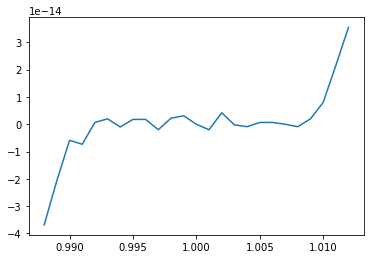

In [21]:
x = np.arange(0.988, 1.012, 0.001)
y = np.array([poly(coef, i) for i in x])

plt.plot(x, y)

### Assignment 4
The errors occur because of loss of significance erros. We can compute them more exactly by using the following properties between roots: $$r_1 + r_2 = \frac{-b}{a}$$ and $$r_1 \cdot r_2 = \frac{c}{a}$$

In [22]:
#Assignment 4

def roots(a, b, c):
    return ((-b + np.sqrt(b**2 - 4*a*c)) / (2 * a), (-b - np.sqrt(b**2 - 4*a*c)) / (2 * a))

In [23]:
roots(1, 1e8, 1)

(-7.450580596923828e-09, -100000000.0)

### Assignment 5
???

In [24]:
#Assignment 5

t = 0.1
n = np.arange(1, 11)
e = n / 10 - n * 0.1
e

array([ 0.00000000e+00,  0.00000000e+00, -5.55111512e-17,  0.00000000e+00,
        0.00000000e+00, -1.11022302e-16, -1.11022302e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

### Assignment 6

In [30]:
#Assignment 6

def f(R):
    return -1 / (19.01 + 273.15) + 1.129241 * 10**(-3) + 2.341077 * 10**(-4) * np.log(R) + 8.775468 * 10**(-8) * (np.log(R))**3

def f1(R):
    return -1 / (18.99 + 273.15) + 1.129241 * 10**(-3) + 2.341077 * 10**(-4) * np.log(R) + 8.775468 * 10**(-8) * (np.log(R))**3

def f_prime(R):
    return 2.341077 * 10**(-4) * 1 / (R) + 8.775468 * 10**(-8) * 3 * (np.log(R))**2 * 1 / (R)

In [31]:
def Newton(xn):
    x_1 = 0
    temp = 0
    while (abs(xn - temp) > 10**(-5)):
        x_1 = xn - f(xn)/f_prime(xn)
        #print(x_1 - xn)
        temp = xn
        xn = x_1
    return x_1

def Newton1(xn):
    temp = 0
    x_1 = 0
    while (abs(xn - temp) > 10**(-5)):
        x_1 = xn - f1(xn)/f_prime(xn)
        #print(x_1 - xn)
        temp = xn
        xn = x_1
    return x_1

In [32]:
Newton(15000)

13066.542623383364

In [33]:
Newton1(15000)

13078.426633664936

### Assignment 7
The algorithm converges slowly even though we gave it a starting point that is quite close to the root because the graph of the function is tangent to $y = 0$. I suppose the Aitken algorithm would make it converge faster, but I cannot implement it.

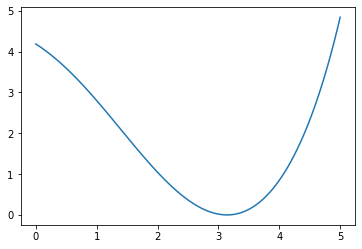

In [2]:
#Assignment 7

def g(x):
    return np.exp(x - math.pi) + np.cos(x) - x + math.pi

def g_prime(x):
    return np.exp(x-math.pi) - np.sin(x) - 1

def Newton3(xn):
    x_1 = 0
    temp = 0
    while (abs(xn - temp) > 10**(-5)):
        x_1 = xn - g(xn)/g_prime(xn)
        print(x_1 - xn)
        temp = xn
        xn = x_1
    return x_1

x = np.linspace(0, 5, 100)
y = np.array([g(i) for i in x])
plt.plot(x, y)

In [5]:
Newton3(3.5)

-0.17418634617428363
-0.09075142793087476
-0.04637859528990562
-0.02345413447872513
-0.011795276887989647
-0.00591495733507541
-0.002961842785613289
-0.0014820167915186033
-0.0007412827961088553
-0.0003707100672496466
-0.00018537220952863365
-9.26903993216932e-05
-4.634627483657283e-05
-2.3173404590348667e-05
-1.158676993506802e-05
-5.793395361219922e-06


3.141598447009082

### Assignment 9

In [37]:
def escVal(z_0, c, N):
    n = 0
    while (abs(z_0) <= 2) & (n <= N):
        z_0 = z_0 ** 2 + c
        #print(z_0)
        n += 1
    return n - 1

In [38]:
def juliaSet(z_max, c, N):
    x = np.linspace(-z_max, z_max, 500).reshape([1, 500])
    y = np.linspace(-z_max, z_max, 500).reshape([500, 1])
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    M = []
    a = []
    for row in Z:
        for element in row:
            a.append(escVal(element, c, N))
        M.append(a)
        a = []
    return np.array(M)
#Takes a while to run, but it works. Couldn't find a method that does not iterate through all items.

In [39]:
M = juliaSet(1, -0.297491 + 0.641051j, 100)

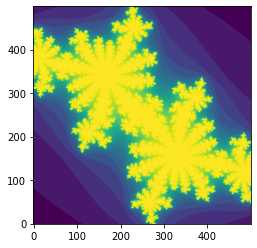

In [40]:
plt.imshow(np.arctan(0.1 * M), origin="lower")